**CAR PRICE PREDICTION PROJECT**


In [ ]:
#Importing neccesary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
df =pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.shape


(301, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
#to check for missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
#checking the distribution of categorical values
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [ ]:
#encoding the categorical data

df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace = True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace = True)

In [ ]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
# Train Test Split
X =df.drop(['Car_Name','Selling_Price'],axis=1)
y= df['Selling_Price']
print(X.shape)
print(y.shape)


(301, 7)
(301,)


In [ ]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.15,random_state=2)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(255, 7)
(255,)
(46, 7)
(46,)


In [ ]:
X.columns

Index(['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type',
       'Transmission', 'Owner'],
      dtype='object')

Linear Regression


In [ ]:
# Model Learning
reg = LinearRegression()
reg.fit(X_train ,y_train)
print("Intercept :",reg.intercept_)
print("Coefficient:",reg.coef_)

Intercept : -832.2179240388901
Coefficient: [ 4.13985154e-01  4.35468583e-01 -6.30863150e-06  1.87282050e+00
 -1.00220913e+00  1.52046948e+00 -8.57942090e-01]


In [ ]:
# Training data prediction
y_training_prediction = reg.predict(X_train)

In [ ]:
# Model Evaluation
R2_score = metrics.r2_score(y_train,y_training_predicion)

R2_score




0.8788102076855941

Text(0.5, 1.0, 'Actual vs Predicted Price')

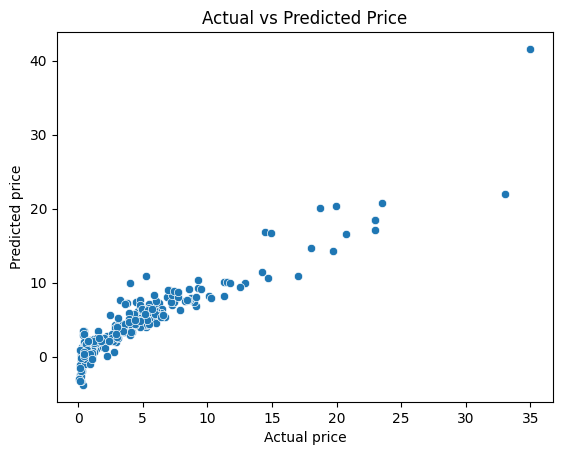

In [ ]:
#Visualizing actual price and Predicted price
sns.scatterplot(x=y_train, y=y_training_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted Price')


In [ ]:
#Testing data prediction
y_test_prediction=reg.predict(X_test)

In [ ]:
R2_score1 = metrics.r2_score(y_test,y_test_prediction)
R2_score1

0.8635018684158171

Text(0.5, 1.0, 'Actual vs Predicted Price')

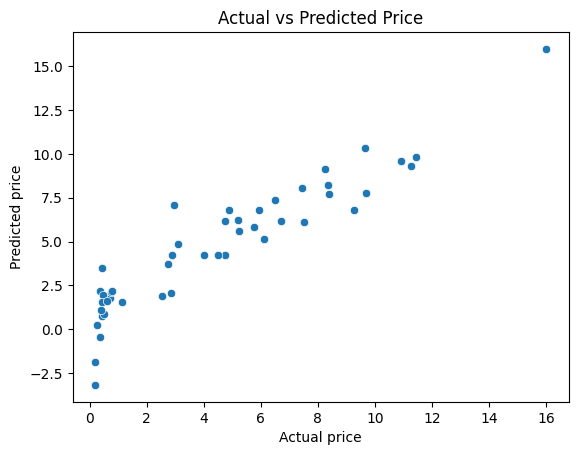

In [ ]:
#Visualizing actual price and Predicted price
sns.scatterplot(x=y_test, y=y_test_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted Price')

Lasso Regression

In [ ]:
#Model training

lasso = Lasso()
lasso.fit(X_train,y_train)
print('intercept :',lasso.intercept_)
print('coeff:',lasso.coef_)

intercept : -703.5808421334485
coeff: [ 3.49916231e-01  5.08248904e-01 -6.64706752e-06  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00]


In [ ]:
y1_training_prediction = lasso.predict(X_train)

In [ ]:
R2_score2 = metrics.r2_score(y_train,y1_training_prediction)
R2_score2

0.8400293350672257

Text(0.5, 1.0, 'Actual vs Predicted Price')

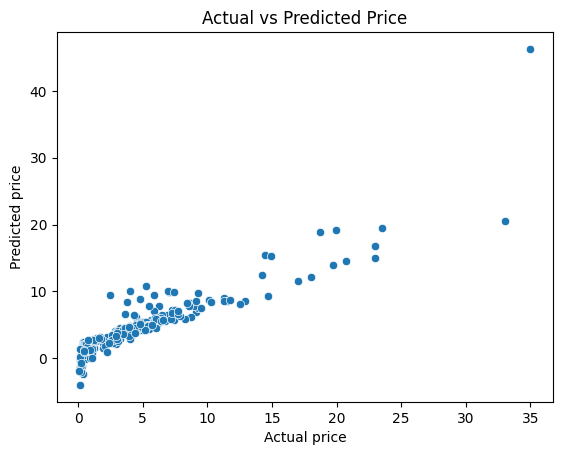

In [ ]:
#Visualization of Actual vs Predictions
sns.scatterplot(x= y_train, y=y1_training_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted Price')

In [ ]:
y1_test_prediction = lasso.predict(X_test)

In [ ]:
R2_score3 = metrics.r2_score(y_test,y1_test_prediction)
R2_score3

0.8940142482159141

Text(0.5, 1.0, 'Actual vs Predicted Price')

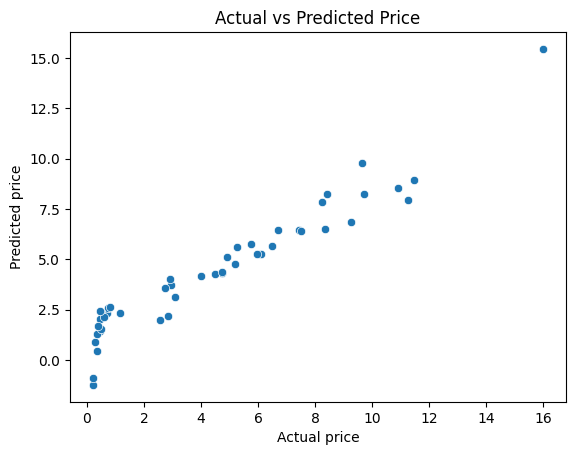

In [ ]:
#Visualization of Actual vs Predictions
sns.scatterplot(x= y_test, y=y1_test_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted Price')